In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from sklearn.metrics import mean_squared_error 

from helpers import *
# ensure the notebook generate 
#the same randomess
np.random.seed(1)

### Sprawdzenie opcji umiarkowanej

In [2]:
n = 100
r = 10000

In [3]:


PoA_mean, PoA_min = generate_nPoA(r, n, bet_moderate, bet_normal, args_equi = [], args_dist = [1])


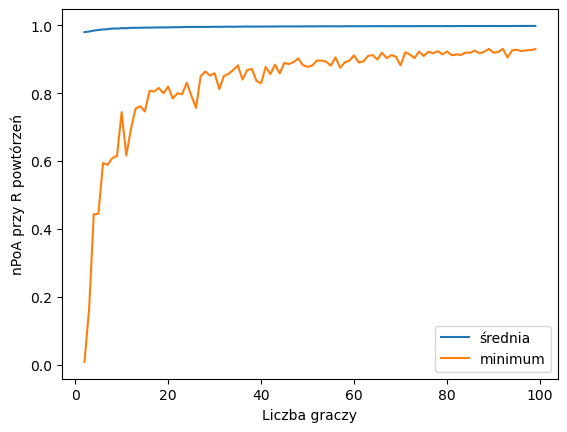

In [4]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('pictures/discoveries/moderate_second_price_no_overbetting.png')

### Sprawdzenie Beta'' z overbettingiem

In [53]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all_better, bet_normal, args_equi = [], args_dist = [0])

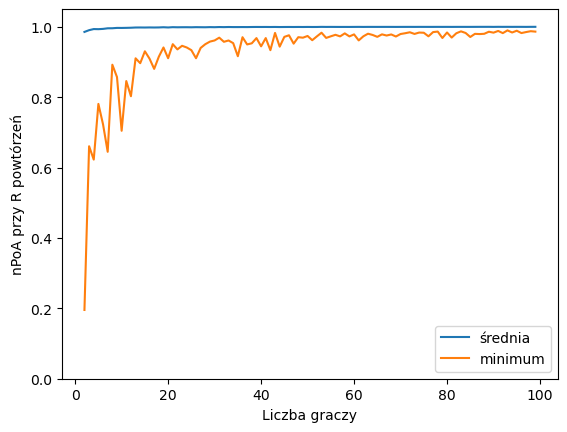

In [54]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/discoveries/better_all_pay_overbetting.png')

### Sprawdzenie Beta'' bez overbettingu

In [55]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all_better, bet_normal, args_equi = [], args_dist = [1])

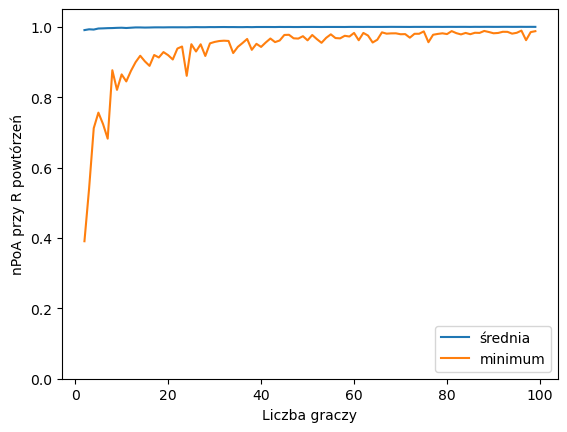

In [56]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/discoveries/better_all_pay_no_overbetting.png')

### Sprawdzenie Beta '' z betą

In [57]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all_better, draw_beta_dist, args_equi = [], args_dist = [])

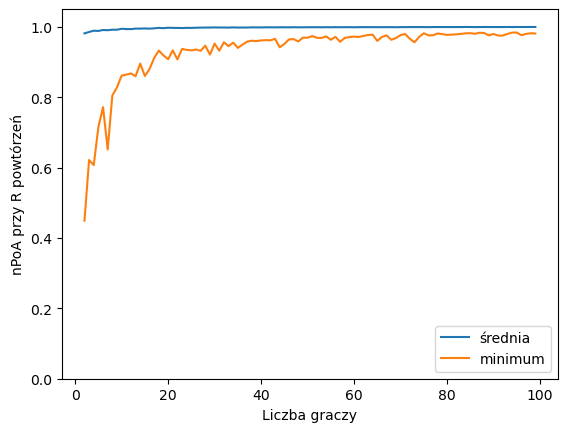

In [58]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/discoveries/better_all_pay_beta.png')

### Statystyki porównawcze dla ofert z U(0,1)

In [9]:
PoA_mean_uniform, PoA_min_uniform = generate_nPoA(r, n, bet_Bayes_Nash, bet_random, args_equi = [], args_dist = [])

In [10]:
n = 100
r = 1000
xs = list(np.linspace(start=0.0, stop=1, num=100))

### Szukanie lepszego wykładnika liniowo z overbettingiem

In [11]:

MSE_best = np.inf
for x in xs:
    PoA_mean, PoA_min = generate_nPoA(r, n, bet_between, bet_normal, args_equi = [x], args_dist = [0])
    MSE = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE < MSE_best:
        MSE_best = MSE
        x_best = x

In [12]:
print(x_best)

0.04040404040404041


In [13]:
print(MSE_best)

0.019664946282928614


In [14]:

PoA_mean, PoA_min = generate_nPoA(r, n, bet_between, bet_normal, args_equi = [x_best], args_dist = [0])


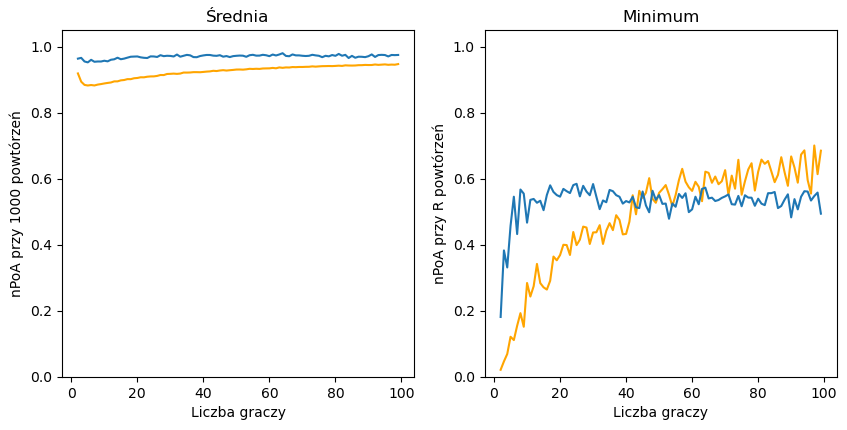

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/discoveries/normal_comparison_lin.png')

### Szukanie lepszego wykładnika liniowo dla rozkładu beta


In [16]:
MSE_best = np.inf
for x in xs:
    PoA_mean, PoA_min = generate_nPoA(r, n, bet_between, draw_beta_dist, args_equi = [x], args_dist = [])
    MSE = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE < MSE_best:
        MSE_best = MSE
        x_best = x

C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: divide by zero encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: divide by zero encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarnin

In [36]:
print(x_best)

0.04040404040404041


In [37]:
print(MSE_best)

0.056486471036519464


In [48]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_between, draw_beta_dist, args_equi = [0.0000000000001], args_dist = [])


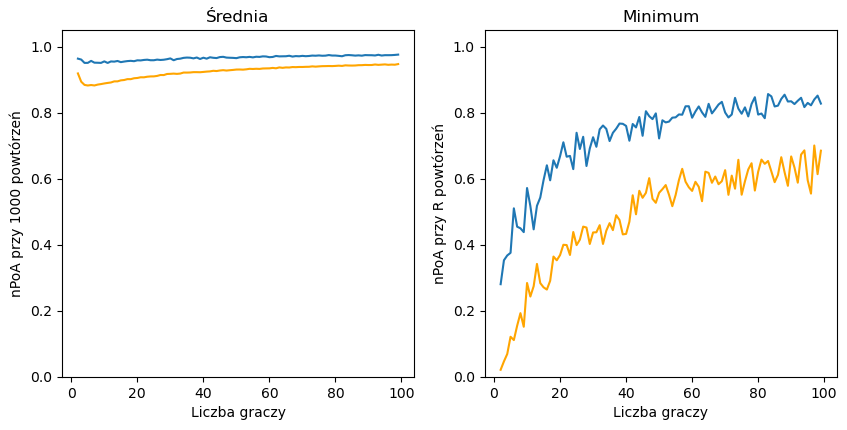

In [49]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")

ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/discoveries/beta_comparison_lin.png')

### Szukanie lepszego wykładnika z logarytmem z rozkładu beta

In [21]:
xs = list(np.linspace(start=0.51, stop=0.99, num=49))

print(xs)

[0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.8400000000000001, 0.8500000000000001, 0.8600000000000001, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.9299999999999999, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]


In [22]:
MSE_best_log = np.inf

for x in xs:
    PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all_log, draw_beta_dist, args_equi = [x], args_dist = [])

    MSE_log = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE_log < MSE_best_log:
        MSE_best_log = MSE_log
        x_best_log = x

In [23]:
MSE_best_log

0.05686333852869595

In [24]:
x_best_log

0.96

In [25]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all_log, draw_beta_dist, args_equi = [x_best_log], args_dist = [])

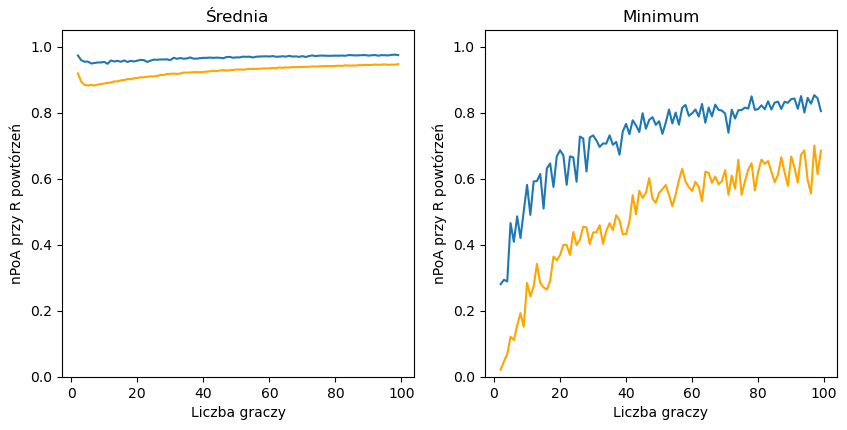

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy R powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/discoveries/beta_comparison_log.png')

In [27]:
a = list(np.linspace(start=1.1, stop=4, num=99))


In [28]:
MSE_best_a = np.inf

for A in a:
    PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all, draw_beta_dist, args_equi = [], args_dist = [A])

    MSE_a = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE_a < MSE_best_a:
        MSE_best_a = MSE_a
        x_best_a = A

C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: divide by zero encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: divide by zero encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: divide by zero encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: Runtime

In [29]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all, draw_beta_dist, args_equi = [], args_dist = [x_best_a])

C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: divide by zero encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode


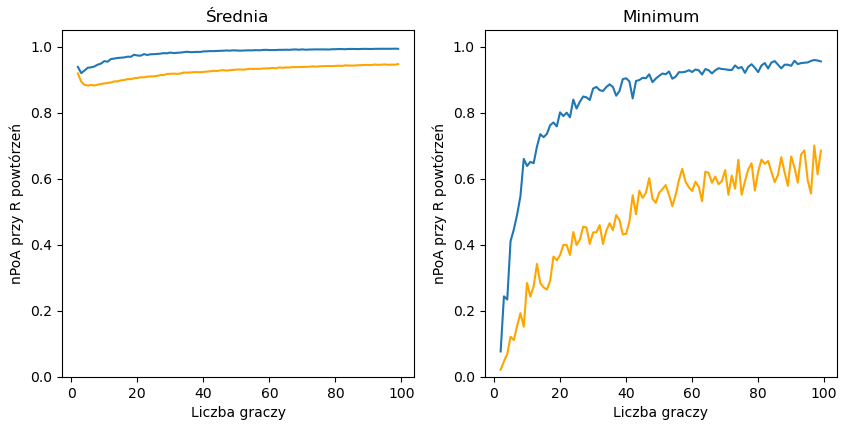

In [30]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy R powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/discoveries/beta_comparison_a.png')

### Szukanie lepszego wykładnika z logarytmem z overbettingiem

In [31]:
MSE_best_log = np.inf

for x in xs:
    PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all_log, bet_normal, args_equi = [x], args_dist = [0])

    MSE_log = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE_log < MSE_best_log:
        MSE_best_log = MSE_log
        x_best_log = x

In [32]:
print(MSE_best_log)
print(x_best_log)

0.02268711629594487
0.94


In [33]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all_log, bet_normal, args_equi = [x_best_log], args_dist = [0])


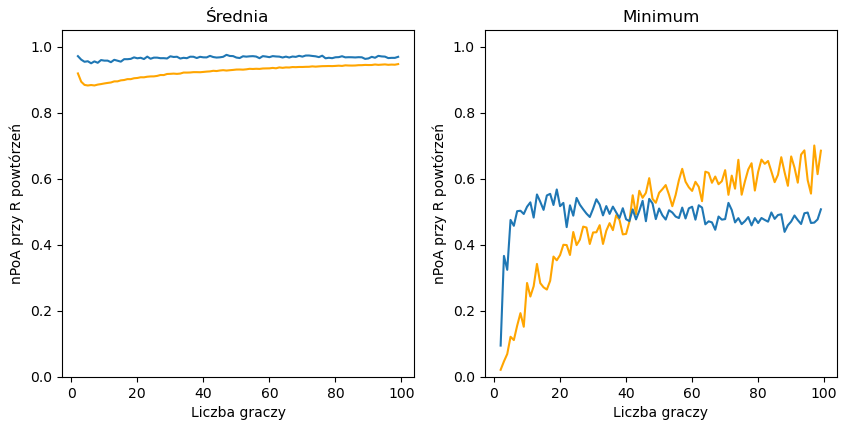

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy R powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/discoveries/normal_comparison_log.png')

5 1.571428571428572 0.35


<Axes: >

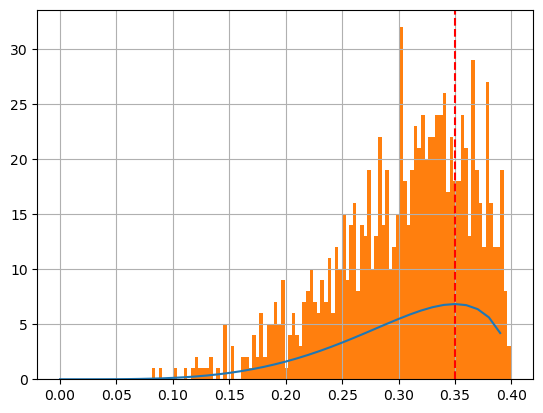

In [35]:
V = 0.4
x = np.arange(0, V, 0.01)
a = 5
Vp = 0.35
mode = Vp/V
b = (a * (1-mode)-1+2*mode)/mode
# density of beta distribution
from scipy import stats
plt.plot(x, stats.beta.pdf(x, a, b, 0, V))
mode = V * (a - 1) / (a + b - 2)
# print vline
print(a, b, mode)
plt.axvline(mode, color='r', linestyle='--')

# sample from beta
sample = np.random.beta(a, b, 1000)*V

pd.Series(sample).hist(bins=100)